# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Libraries**

In [58]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
%matplotlib inline 
pd.options.display.max_columns=999
warnings.filterwarnings("ignore")

**Import Dataset**

In [59]:
data=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Seoul Bike Prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

In [60]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [61]:
#Statistical Information
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Observations:

* Count of all features is same: 8760 i.e., No missings values
* Minimum and maximum number of bikes rented/day is 0 and 3556 resp.
* Average number of bikes rented/day = 704

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [63]:
#check unique values of the features
data.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Observation:

* Data is recorded for:
    * 365 days and throughout the day(24 hours).
    * 4 different seasons 
    * Holiday and No Holiday Days
    * Functioning and No Functioning Days

**Data Pre-processing**

In [64]:
#confirm the null values 
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [65]:
#rename the column names for easy access
data.rename(columns={'Temperature(°C)':'Temperature', 'Humidity(%)': 'Humidity','Wind speed (m/s)': 'Wind Speed',"Dew point temperature(°C)": 'Dew point temperature','Visibility (10m)':'Visibility', "Solar Radiation (MJ/m2)": 'Solar radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)': 'Snowfall' },inplace=True)

In [66]:
data['Date']=pd.to_datetime(data["Date"])
data['Month']=data['Date'].dt.month


In [67]:
# change the datatype of categorical columns to categorical 
categorical_cols=['Seasons','Holiday','Functioning Day','Hour',"Date","Month"]
for col in categorical_cols:
  data[col]=data[col].astype("category")
Numerical_cols=['Temperature','Humidity','Visibility','Wind Speed','Dew point temperature','Solar radiation','Rainfall','Snowfall']

for col in Numerical_cols :
  data[col] = data[col].astype('float64')


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   8760 non-null   category
 1   Rented Bike Count      8760 non-null   int64   
 2   Hour                   8760 non-null   category
 3   Temperature            8760 non-null   float64 
 4   Humidity               8760 non-null   float64 
 5   Wind Speed             8760 non-null   float64 
 6   Visibility             8760 non-null   float64 
 7   Dew point temperature  8760 non-null   float64 
 8   Solar radiation        8760 non-null   float64 
 9   Rainfall               8760 non-null   float64 
 10  Snowfall               8760 non-null   float64 
 11  Seasons                8760 non-null   category
 12  Holiday                8760 non-null   category
 13  Functioning Day        8760 non-null   category
 14  Month                  8760 non-null   c

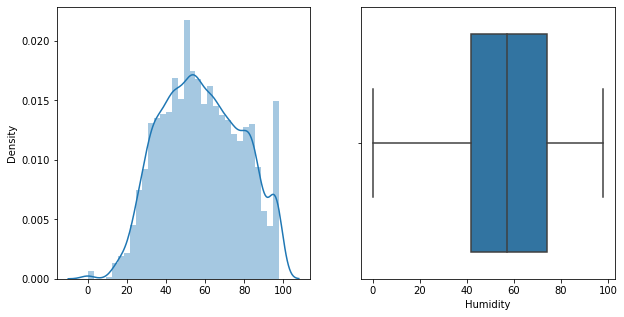

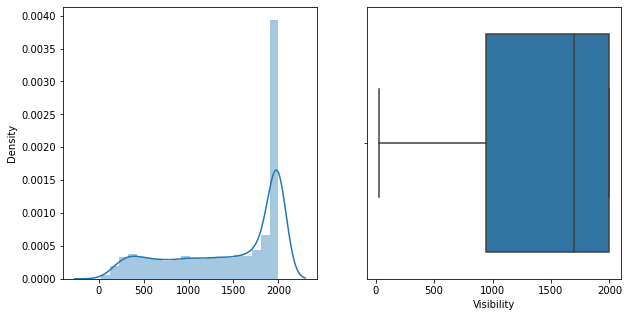

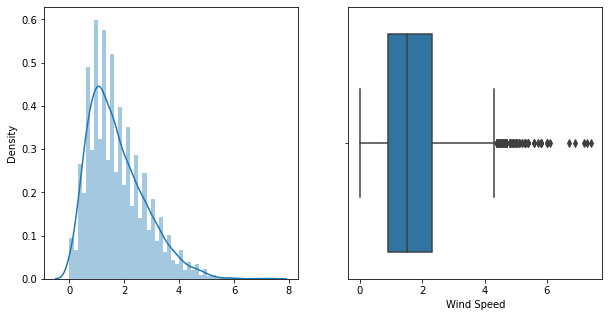

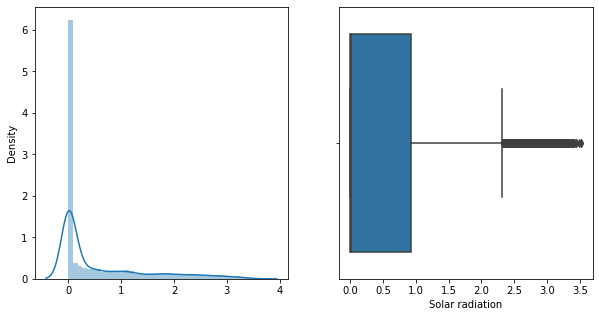

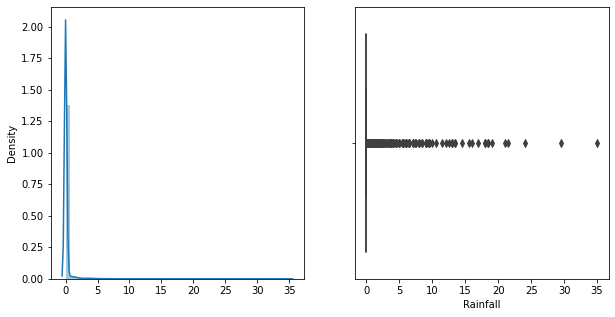

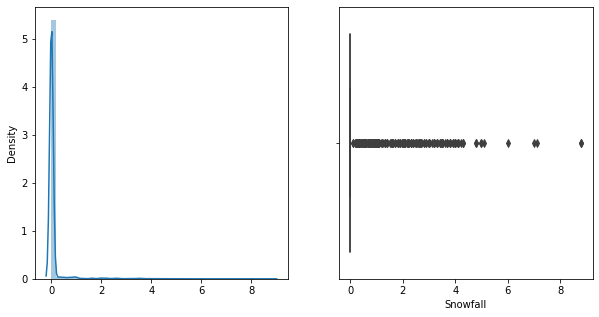

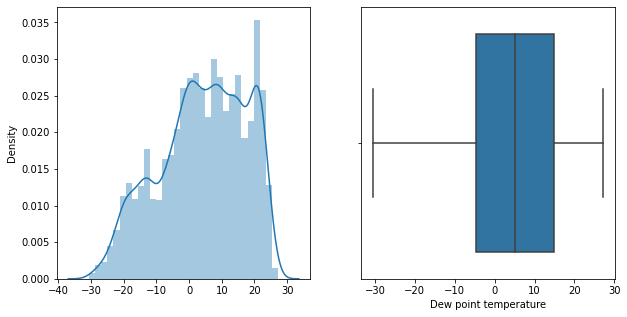

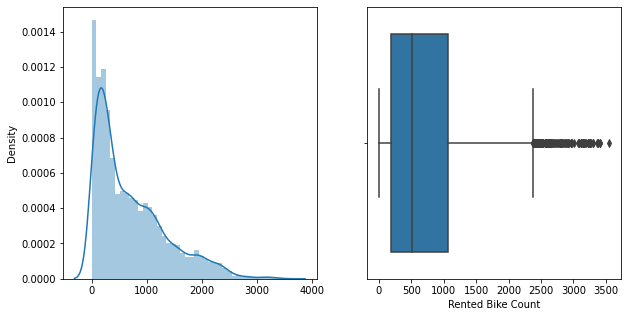

In [68]:
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall','Dew point temperature', 'Rented Bike Count']

for col in numerical_cols[1:]:
    feature=data[col]
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.distplot(x=feature,ax=axes[0])
    sns.boxplot(x=feature,ax=axes[1])
plt.show()

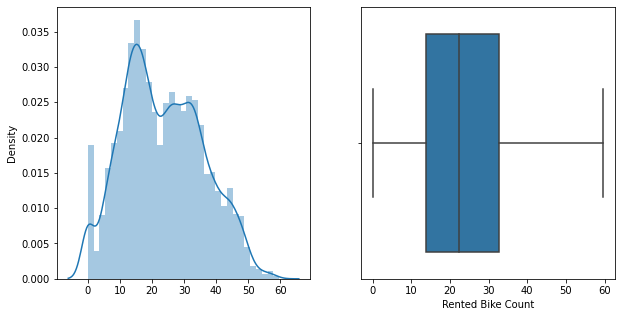

In [69]:
 #Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.distplot(x=np.sqrt(data['Rented Bike Count']),ax=axes[0])
sns.boxplot(x=np.sqrt(data['Rented Bike Count']),ax=axes[1])

**Exploratory Data Analysis**

Bike rent at particular hour of the day

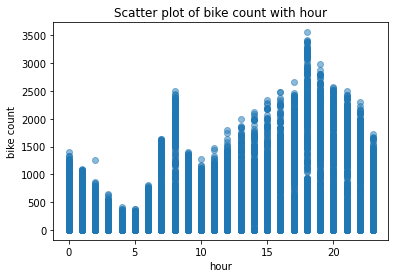

In [70]:
plt.scatter(data['Hour'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()

In [71]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [72]:
seasons_data = data.groupby(['Seasons'])['Rented Bike Count'].max().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)


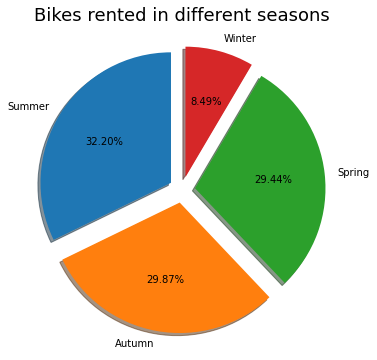

In [73]:
plt.rcParams['figure.figsize'] = (10,6)
rents = seasons_data['Rented Bike Count']
plt.pie(rents, labels = seasons_data['Seasons'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1], shadow = True )
plt.title('Bikes rented in different seasons', {'fontsize': 18})
plt.show()

Bike Rent Count Analysis for:

1. Throughout the day for all seasons

[Text(0.5, 1.0, 'Bikes Rented in different Seasons')]

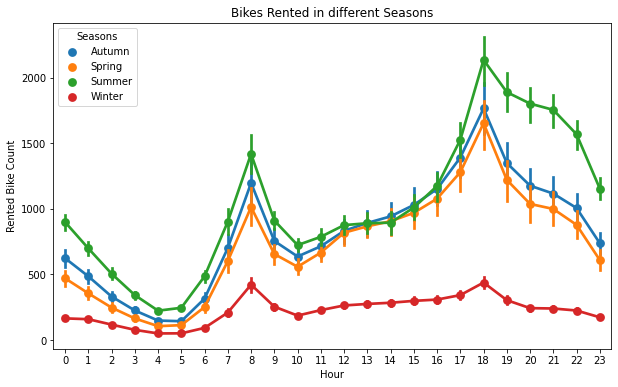

In [74]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Seasons", ax=ax)
ax.set(title="Bikes Rented in different Seasons")

Observation:

* Winter has comparitively lesser bike-rents
* 8:00 am and 6:00 pm are the peak hours of bike-rents
* Bike-rents in the morning are lesser than that of evening  

2. Bike rent analysis on Holiday vs No Holiday 

[Text(0.5, 1.0, 'Bikes Rented on Holidays vs No Holidays')]

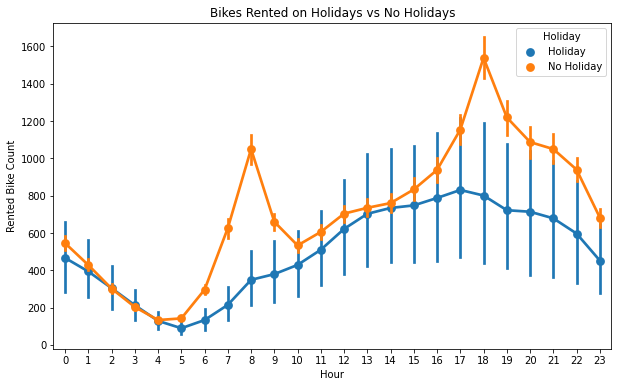

In [75]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Holiday", ax=ax)
ax.set(title="Bikes Rented on Holidays vs No Holidays")

Observation:

* On No Holidays, bike-rents start arount 5:00 am and are highest during the peak hours.
* On Holidays the bike-rents are casually increasing from 8:00 am to 5:00 pm and decrease afterrwards.

3. Functional Day vs No Functional Day

[Text(0.5, 1.0, 'Bikes Rented on Functional Days vs No Functional Days')]

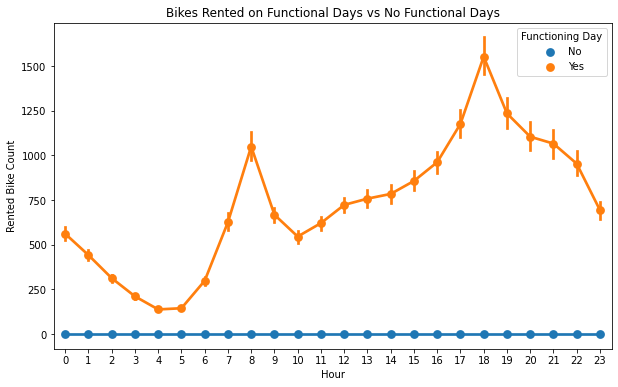

In [76]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Functioning Day", ax=ax)
ax.set(title="Bikes Rented on Functional Days vs No Functional Days")

Observation: 

* No bike-rents observed on No Functional days.

Regression Plots 

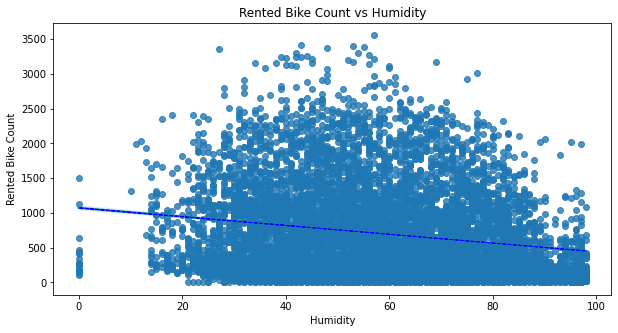

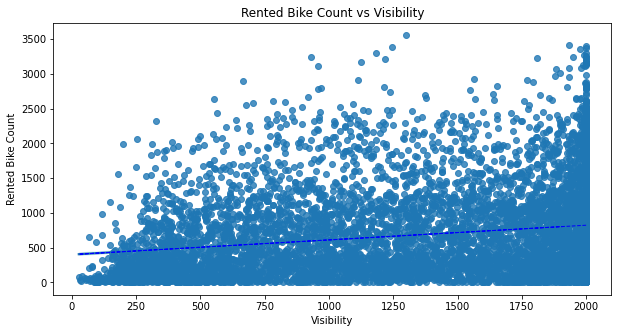

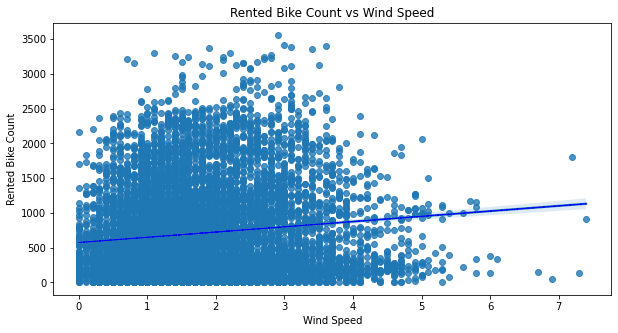

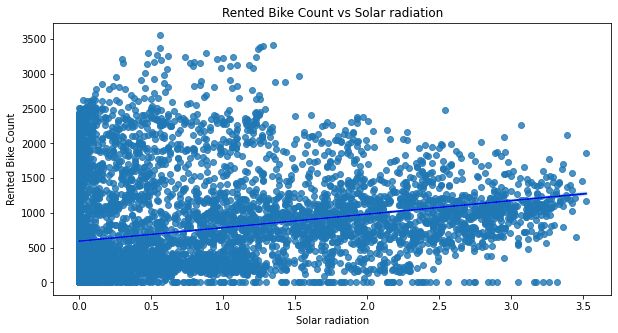

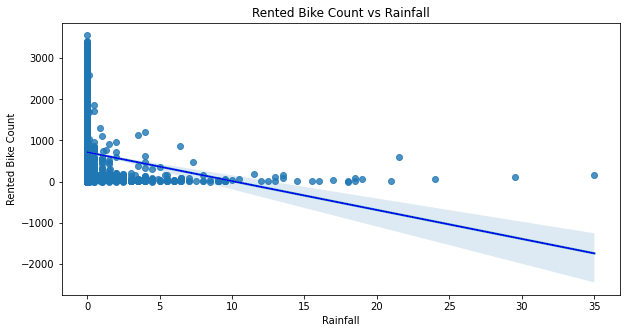

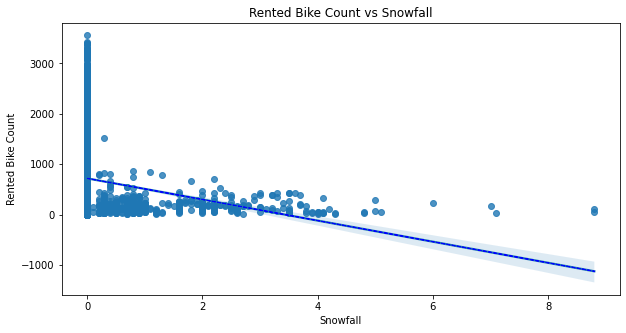

In [77]:
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall']

for col in numerical_cols[1:]:
    fig = plt.figure(figsize=(10,5))
    ax = fig.gca()

    feature = data[col]
    label = data['Rented Bike Count']
    sns.regplot(data=data, x=feature, y=label,ax=ax)
    ax.set_title('Rented Bike Count vs '+ col)
    fit = np.polyfit(data[col], data['Rented Bike Count'], 1)
    fit1= np.poly1d(fit)(data[col])

    plt.plot(data[col], fit1, "b--", lw=1)

plt.show()

In [78]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month
0,2017-01-12,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,2018-11-30,764,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,2018-11-30,694,21,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,2018-11-30,712,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


In [79]:
t=data

[Text(0.5, 1.0, 'Bike Rent Count per year')]

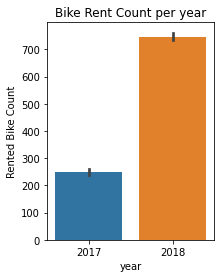

In [80]:
# creating a column containing the year from a particular date
year = []
df=data
for i in range(len(data['Date'])):
  year.append(data['Date'][i].year)
df['year'] = year
fig, ax=plt.subplots(figsize=(3,4))
sns.barplot(data=df,x='year',y='Rented Bike Count')
ax.set(title='Bike Rent Count per year')

In [81]:
data=data.drop(['Date','year'],axis=1)
data

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,764,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,694,21,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,712,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


Correlation

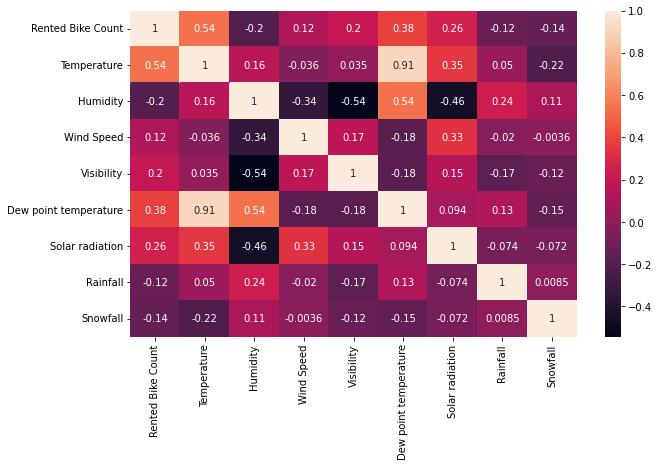

In [82]:
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

Observation:

* Temperature has correlation (0.54) with the count of bike-rents.
* Temperature and dew-point temperature are highly correlated. One of the features could be dropped.
* Humidity is positively correlated(0.54) with dew-point temperature as much as it is negatively correlated(-0.54) with Visibility.
* Solar Radiation has slight negative correlation with Humidity.
* Wind Speed, Rainfall and Snowfall have very less impact on the count of bike-rents 

In [88]:
# function to calculate Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
data[Numerical_cols]

In [89]:
calculate_vif(data[[i for i in Numerical_cols]])

,variables,VIF
0,Temperature,29.075866
1,Humidity,5.069743
2,Visibility,9.051931
3,Wind Speed,4.517664
4,Dew point temperature,15.201989
5,Solar radiation,2.821604
6,Rainfall,1.079919
7,Snowfall,1.118903


In [92]:
data.drop('Dew point temperature',inplace=True,axis=1)


In [94]:
calculate_vif(data[[i for i in Numerical_cols if  i not in ['Dew point temperature']]])

,variables,VIF
0,Temperature,3.166007
1,Humidity,4.758651
2,Visibility,4.409448
3,Wind Speed,4.079926
4,Solar radiation,2.246238
5,Rainfall,1.078501
6,Snowfall,1.118901


In [96]:
data_new = data

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['Seasons','Month','Hour','Holiday','Functioning Day']

for col in cols:
    data_new = one_hot_encoding(data_new, col)
data_new.head()

,Rented Bike Count,Temperature,Humidity,Wind Speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,204,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,173,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,107,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,78,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [97]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   float64
 3   Wind Speed           8760 non-null   float64
 4   Visibility           8760 non-null   float64
 5   Solar radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Seasons_Autumn       8760 non-null   uint8  
 9   Seasons_Spring       8760 non-null   uint8  
 10  Seasons_Summer       8760 non-null   uint8  
 11  Seasons_Winter       8760 non-null   uint8  
 12  Month_1              8760 non-null   uint8  
 13  Month_2              8760 non-null   uint8  
 14  Month_3              8760 non-null   uint8  
 15  Month_4              8760 non-null   u



---



---



---



In [99]:
df=data_new

In [98]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [101]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented Bike Count',axis=1)
y=np.sqrt(df['Rented Bike Count'])

In [102]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [103]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [104]:

# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 51)
(6132,)
(2628, 51)
(2628,)
(6132, 51)
(6132,)
(2628, 51)
(2628,)


In [106]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [108]:
# Cheeck coefficents
l_reg.coef_

array([ 2.69585862e+01, -1.38178839e+01, -1.06723485e+00,  1.10278327e+00,
        3.66218862e+00, -5.17382397e+01,  6.50125570e-01,  7.16941102e+12,
        7.16941102e+12,  7.16941102e+12,  7.16941102e+12,  2.51117553e+12,
        2.51117553e+12,  2.51117553e+12,  2.51117553e+12,  2.51117553e+12,
        2.51117553e+12,  2.51117553e+12,  2.51117553e+12,  2.51117553e+12,
        2.51117553e+12,  2.51117553e+12,  2.51117553e+12,  5.09937052e+11,
        5.09937052e+11,  5.09937052e+11,  5.09937052e+11,  5.09937052e+11,
        5.09937052e+11,  5.09937052e+11,  5.09937052e+11,  5.09937052e+11,
        5.09937052e+11,  5.09937052e+11,  5.09937052e+11,  5.09937052e+11,
        5.09937052e+11,  5.09937052e+11,  5.09937052e+11,  5.09937052e+11,
        5.09937052e+11,  5.09937052e+11,  5.09937052e+11,  5.09937052e+11,
        5.09937052e+11,  5.09937052e+11,  5.09937052e+11,  2.23325599e+12,
        2.23325599e+12, -1.63275958e+12, -1.63275958e+12])

In [109]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Temperature,2.695859e+01
Humidity,-1.381788e+01
Wind Speed,-1.067235e+00
Visibility,1.102783e+00
Solar radiation,3.662189e+00
Rainfall,-5.173824e+01
Snowfall,6.501256e-01
Seasons_Autumn,7.169411e+12
Seasons_Spring,7.169411e+12
Seasons_Summer,7.169411e+12


In [110]:

# Check intercept
l_reg.intercept_

-10791020009633.717

In [111]:
#Checking score
l_reg.score(X_train,y_train)

0.7564042512941418

In [112]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [113]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 4.671339076004403.
The Mean Squred Error(MSE) is 37.891929697627916.
The Root Mean Squared Error(RMSE) is 6.155642102788946.
The R2 Score is 0.7564042512941418.


In [114]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [115]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
1,Linear Regression,4.6713,37.8919,6.1556,0.7564


### Evaluation of Test data set

In [116]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 4.6729488076070025.
 The Mean Squred Error(MSE) is 36.621683992854805.
The Root Mean Squared Error(RMSE) is 6.051585246268519.
The R2 Score is 0.7615746068930925.


In [117]:
# saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [118]:
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,Model,MAE,MSE,RMSE,R2_score
1,Linear Regression,4.6729,36.6217,6.0516,0.7616


On testing data R2 score is 0.6183 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed. We need to improve our model performance.

In [119]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [120]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")


In [121]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")


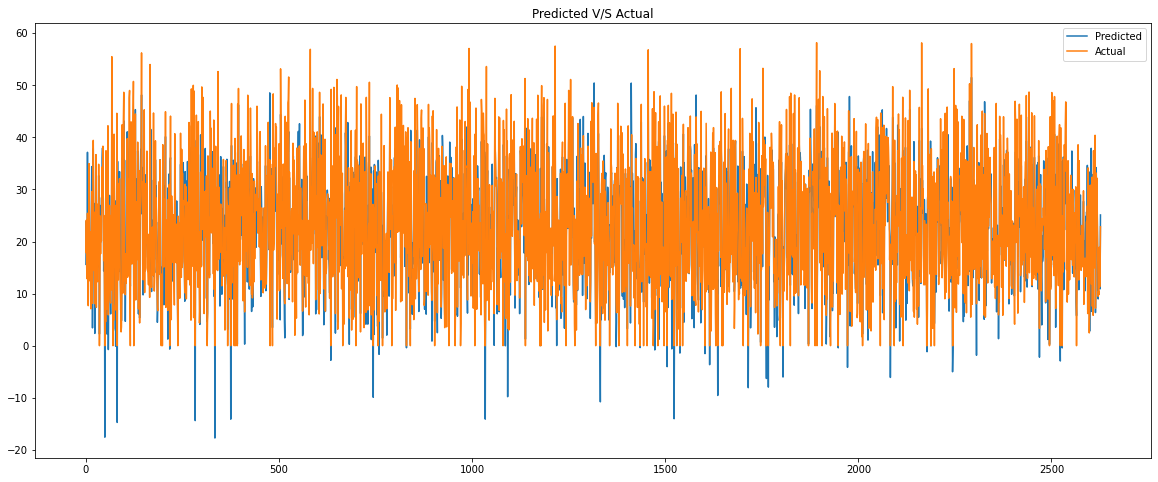

In [122]:
plot_Pred_vs_actual(y_pred,y_test)


Text(0.5, 0, 'y_predicted')

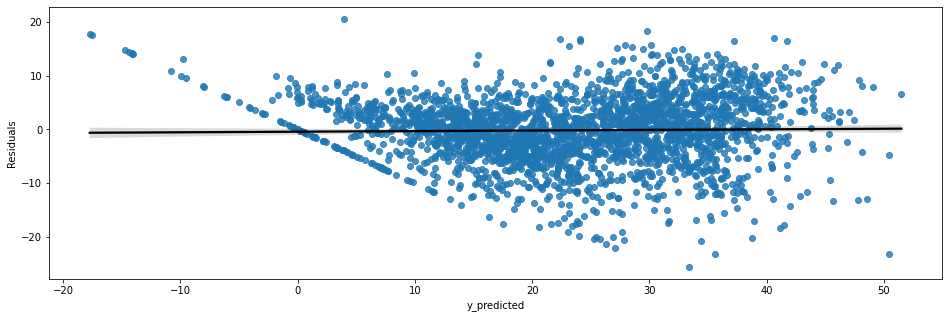

In [123]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

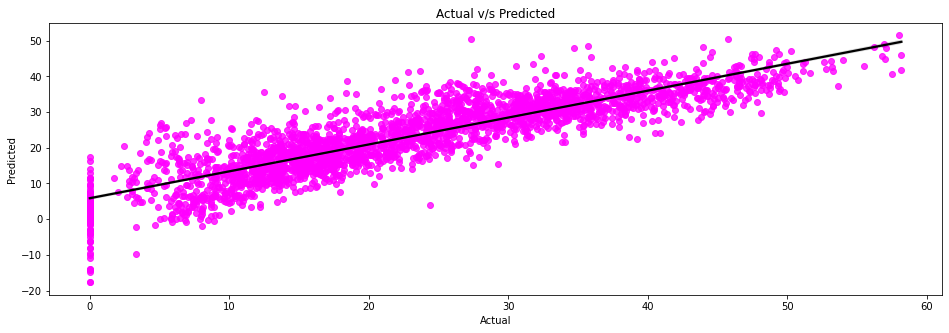

In [124]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

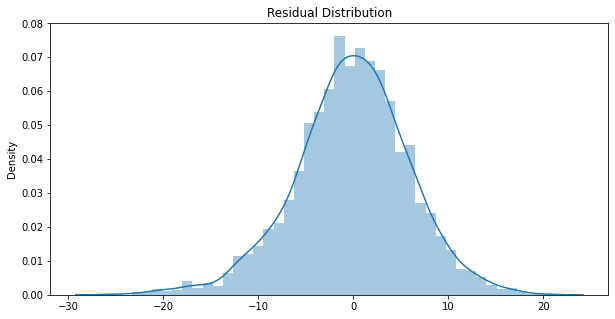

In [125]:
Residual_distPlot(y_pred,y_test)